In [ ]:
#@title Install prerequisite
# Install prerequisite, no need to run this if you are running the notebook from
# your laptop and you already install the packages in Anaconda 

!pip install biopython

# install clustalo command line
!wget http://www.clustal.org/omega/clustalo-1.2.4-Ubuntu-x86_64
!sudo chmod u+x clustalo-1.2.4-Ubuntu-x86_64
!ln -s $(pwd)/clustalo-1.2.4-Ubuntu-x86_64 /bin/clustalo 

     |████████████████████████████████| 2.3MB 8.5MB/s 
--2020-12-20 20:30:06--  http://www.clustal.org/omega/clustalo-1.2.4-Ubuntu-x86_64
Resolving www.clustal.org (www.clustal.org)... 137.43.93.206
Connecting to www.clustal.org (www.clustal.org)|137.43.93.206|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4921774 (4.7M)
Saving to: ‘clustalo-1.2.4-Ubuntu-x86_64’

clustalo-1.2.4-Ubun 100%[===================>]   4.69M  3.08MB/s    in 1.5s    

2020-12-20 20:30:08 (3.08 MB/s) - ‘clustalo-1.2.4-Ubuntu-x86_64’ saved [4921774/4921774]



In [ ]:
pip install biopython --upgrade

Requirement already up-to-date: biopython in /usr/local/lib/python3.6/dist-packages (1.78)


In [ ]:
from Bio import Align
from Bio import Entrez

Entrez.email = "tq2144@columbia.edu"

# query multiple sequences at once by concatenating the difference 
# sequence IDs by commas `,`
seq_id = ",".join(["YP_009724390.1", "YP_009825051.1", "YP_009555241.1",
                   "NP_073551.1", "YP_003767.1", "YP_173238.1","YP_009047204.1"])
handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta")

In [ ]:
# for we want to do multiple sequence alignment later, we save the sequences as
# a fasta file
fasta_file = "cov_protein_seqs.fasta"
with open(fasta_file, "w") as fo:
    fo.write(handle.read())

In [ ]:
!cat cov_protein_seqs.fasta

>YP_009724390.1 surface glycoprotein [Severe acute respiratory syndrome coronavirus 2]
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHV
SGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPF
LGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPI
NLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYN
ENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASV
YAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIAD
YNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYF
PLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFL
PFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLT
PTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLG
AENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGI
AVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDC
LGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQ

In [ ]:
from Bio import SeqIO

In [ ]:
record = SeqIO.parse(open(fasta_file, 'r'),"fasta")

for seq in record:
    print("ID: {}, Length: {}".format(seq.id, len(seq)))

ID: YP_009724390.1, Length: 1273
ID: YP_009825051.1, Length: 1255
ID: YP_009555241.1, Length: 1353
ID: NP_073551.1, Length: 1173
ID: YP_003767.1, Length: 1356
ID: YP_173238.1, Length: 1356
ID: YP_009047204.1, Length: 1353


In [ ]:
from Bio.Align.Applications import ClustalOmegaCommandline

In [ ]:
aln_file = "align_cov_protein_seqs.fasta"
cline = ClustalOmegaCommandline(infile=fasta_file, outfile=aln_file)

print(cline)

clustalo -i cov_protein_seqs.fasta -o align_cov_protein_seqs.fasta


In [ ]:
cline()

('', '')

In [ ]:
!cat align_cov_protein_seqs.fasta

>YP_009724390.1 surface glycoprotein [Severe acute respiratory syndrome coronavirus 2]
----MFVFLVLLPLV-S----------SQC----VN--L-------TT--RTQLP---PA
Y--TNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVT---WFHAIHVSGTNGTKR----
FDNP-VLPFNDGVYFAST---E-----------------------KSNIIRGWIFGTTLD
SKTQ---------SLLI----VNN--------A-----TNVVIKVCE-------------
----------------------------------FQFCNDPFLGVYYHKNN---------
------------KSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNI
DGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQT-----------------
LLALHRSYL---------------TPGD----SSSGWTAGAAAYYVGYLQPRTFLLKYNE
NGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEV
FNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNV------
YADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGN------Y
NYLYRLFRKS------NLKPFERDISTEIYQA--GSTPCNGV----------E--GFNC-
--------------YF-------------PLQSYGFQPT-------------NGVGYQPY
----------------RVVVLSF--------------ELL----HAPATVCGP-----KK
STNLVKNKCVNFNFNGLTGTGVLTESNKKFL-PFQQFGRDIA-DTT-DAVRDPQTLEIL

In [ ]:
from Bio import AlignIO
align = AlignIO.read(aln_file, "fasta")

In [ ]:
print(align)

Alignment with 7 rows and 1660 columns
----MFVFLVLLPLV-S----------SQC----VN--L-----...HYT YP_009724390.1
----MFIFLLFLTLT-S----------GSD----LD--R-----...HYT YP_009825051.1
----MFLILLISLPT-AFAVIGDLKCTSDN----IN--------...D-- YP_009555241.1
--------------------------------------------...--- NP_073551.1
--MKLFLILLVLPLASCFF-----TCNSNANLSMLQLGVPDNSS...--- YP_003767.1
-----MLLIIFILPT-TLAVIGDFNCTNFA----IN--------...D-- YP_173238.1
MIHSVFLLMFLLTPTESYVDVGPDSVKSAC----IEVDI-----...--- YP_009047204.1


In [ ]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(align)

In [ ]:
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

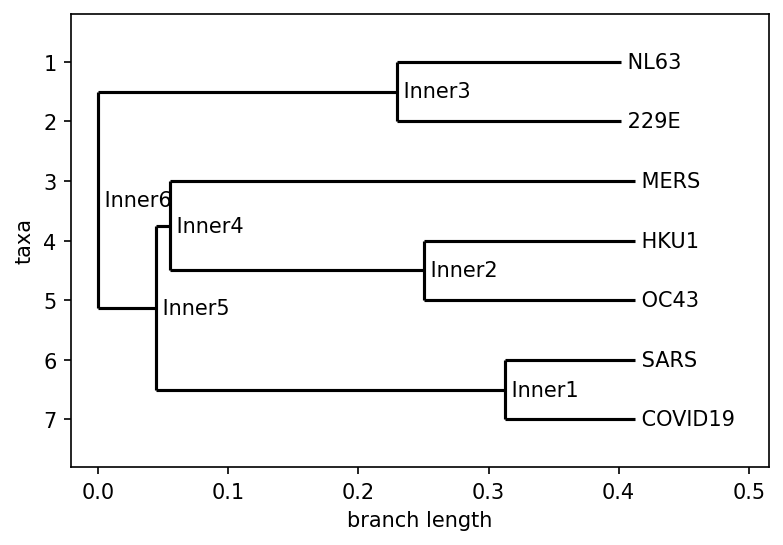

In [ ]:
import matplotlib.pyplot as plt
from Bio import Phylo

# annote each sequence by the virus subtype
virus_subtype_mapping = {
    "YP_009724390.1": "COVID19",
    "YP_009825051.1": "SARS",
    "YP_009555241.1": "OC43",
    "NP_073551.1": "229E",
    "YP_003767.1": "NL63",
    "YP_173238.1": "HKU1",
    "YP_009047204.1": "MERS"
}
fig, ax = plt.subplots(dpi=150)
Phylo.draw(tree, axes=ax,
           label_func=lambda n: virus_subtype_mapping[str(n)]
                                if str(n) in virus_subtype_mapping else str(n))

In [ ]:
import pandas as pd

# Let's read the alignment file again
aln = AlignIO.read(open(aln_file), 'fasta')
align_df = pd.DataFrame(dict([(virus_subtype_mapping[rec.name], list(rec.seq))
                              for rec in aln]))

In [ ]:
align_df

,COVID19,SARS,OC43,229E,NL63,HKU1,MERS
0,-,-,-,-,-,-,M
1,-,-,-,-,-,-,I
2,-,-,-,-,M,-,H
3,-,-,-,-,K,-,S
4,M,M,M,-,L,-,V
...,...,...,...,...,...,...,...
1655,K,K,H,-,-,H,H
1656,L,L,D,-,-,D,-
1657,H,H,D,-,-,D,-
1658,Y,Y,-,-,-,-,-


In [ ]:
# identify reference index using COVID19
aa_index = (align_df["COVID19"] != "-").cumsum()
aa_count = align_df.apply(lambda row: row.nunique(), axis=1)

align_df["aa_index"] = aa_index

In [ ]:
# Calculate maximum mutations per position
muts_per_index = aa_count.groupby(aa_index).max()

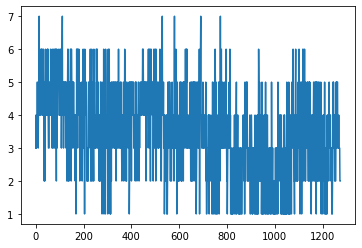

In [ ]:
import seaborn as sns

sns.lineplot(x=muts_per_index.index.values, y=muts_per_index.values)

In [ ]:
# most varied positions
align_df[align_df.aa_index.isin(muts_per_index[muts_per_index == 7].index.values)]

,COVID19,SARS,OC43,229E,NL63,HKU1,MERS,aa_index
28,Q,S,D,-,N,F,A,14
179,D,N,V,-,K,I,G,111
839,K,L,A,S,E,P,T,529
893,Q,K,I,T,S,V,-,580
1008,Q,K,T,D,N,A,E,690
1009,-,-,G,-,-,S,-,690
1097,V,A,E,R,H,G,L,772


In [ ]:
from Bio import Align

In [ ]:
r1 = 'CPFGEVFNATRFASVYAWNRKRISNC'
r2 = 'CYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGC'
r3 = 'CFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPA'
r4 = 'CNGVEGFNC'
pep42 = 'CTVALPGGYVRVC'

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [ ]:
alignment1 = pairwise2.align.globalms(r1, pep42, 2,-1,-1,-0.05)
print(format_alignment(*alignment1[0]))

C----PFGEVFNATRFASVYAWNRKRISNC
|    |.|.|    |   |          |
CTVALPGGYV----R---V----------C
  Score=7.15



In [ ]:
alignment2 = pairwise2.align.globalms(r2, pep42, 2,-1,-1,-0.05)
print(format_alignment(*alignment2[0]))

CYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIA-PGQTGKIADYNYKLPDDFTG---C
|             | |               | ||  |    |             |
C-------------T-V---------------ALPG--G----Y----------VRVC
  Score=7.95



In [ ]:
alignment3 = pairwise2.align.globalms(r3, pep42, 2,-1,-1,-0.05)
print(format_alignment(*alignment3[0]))

CFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPA
| | | |                           ||                   || |                                 |                         ||           .
C-T-V-A---------------------------LP-------------------GG-Y---------------------------------V-------------------------RV-----------C
  Score=8.5



In [ ]:
alignment4 = pairwise2.align.globalms(r4, pep42, 2,-1,-1,-0.05)
print(format_alignment(*alignment4[0]))

C----NG----VEGFNC
|    .|    |    |
CTVALPGGYVRV----C
  Score=3.55



In [ ]:
pip install python-Levenshtein

     |████████████████████████████████| 51kB 843kB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144792 sha256=3e8014fbe59d5cb9790b77a92ac4f2d2890c031f4326add183dea10f6ae890ce
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


In [ ]:
import Levenshtein

In [ ]:
Levenshtein.ratio('C----PFGEVFNATRFASVYAWNRKRISNC'.replace('-',''),
                  'CTVALPGGYV----R---V----------C'.replace('-','')) * 100

35.8974358974359

In [ ]:
Levenshtein.ratio('CYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIA-PGQTGKIADYNYKLPDDFTG---C'.replace('-',''),
                  'C-------------T-V---------------ALPG--G----Y----------VRVC'.replace('-','')) * 100

26.865671641791046

In [ ]:
Levenshtein.ratio('CFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPA'.replace('-',''),
                  'C-T-V-A---------------------------LP-------------------GG-Y---------------------------------V-------------------------RV-----------C'.replace('-','')) * 100

16.551724137931036

In [ ]:
Levenshtein.ratio('C----NG----VEGFNC'.replace('-',''),
                  'CTVALPGGYVRV----C'.replace('-','')) * 100

36.36363636363637